### Uploading File on Google.Colab

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd /content/drive/My Drive

/content/drive/My Drive


## Applying CNN on Feature Extracted

#### Data Preproccessing

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

std = StandardScaler()


data = pd.DataFrame(np.load("dataset.npy",allow_pickle= True))
data.columns = ['feature', 'label']
X = np.array(data.feature.tolist())
std.fit(X)
Y = np.array(data.label.tolist())


**Ploting Distribution of Data Set**

['air_conditioner' 'car_horn' 'children_playing' 'dog_bark' 'drilling'
 'engine_idling' 'gun_shot' 'jackhammer' 'siren' 'street_music']


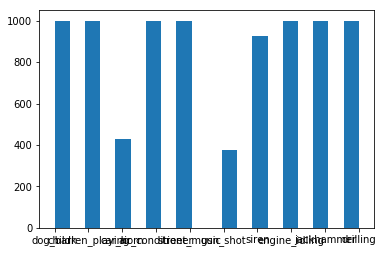

In [209]:
%matplotlib inline
plt.hist(Y, bins = 20);
print(np.unique(Y))

In [210]:
X.shape,Y.shape,X[0].reshape(1,X[0].shape[0]).shape

((8732, 40), (8732,), (1, 40))

In [0]:
from sklearn.model_selection import train_test_split
X,val_x,y,val_y = train_test_split(X,Y,test_size=0.3)
lb = LabelEncoder()

from keras.utils import np_utils

y_en = np_utils.to_categorical(lb.fit_transform(y))
val_y_en = np_utils.to_categorical(lb.fit_transform(val_y))

In [0]:
def acc(y_test,prediction):

    ### PRINTING ACCURACY OF PREDICTION
    ### RECALL
    ### PRECISION
    ### CLASIFICATION REPORT
    ### CONFUSION MATRIX
    cm = confusion_matrix(y_test, prediction)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    print ('Recall:', recall)
    print ('Precision:', precision)
    print ('\n clasification report:\n', classification_report(y_test,prediction))
    print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    
    ax = sns.heatmap(confusion_matrix(y_test, prediction),linewidths= 0.5,cmap="YlGnBu")

#### Model Structure


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import LearningRateScheduler



num_labels = y_en.shape[1]
nets = 5

model = [0] *nets

# build model
for net in range(nets):
  model[net] = Sequential()


  model[net].add(Dense(512, input_shape=(40,)))
  model[net].add(Activation('relu'))
  model[net].add(Dropout(0.45))


  model[net].add(Dense(256))
  model[net].add(Activation('relu'))
  model[net].add(Dropout(0.45))


  model[net].add(Dense(num_labels))
  model[net].add(Activation('softmax'))



  model[net].compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='RMSprop')

In [229]:
model[-1].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_424 (Dense)            (None, 512)               20992     
_________________________________________________________________
activation_424 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_295 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_425 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_425 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_296 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_426 (Dense)            (None, 10)                2570      
__________

In [231]:



# TRAIN NETWORKS
history = [0] * nets
epochs = 132
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = X,val_x, y_en, val_y_en
    history[j] = model[j].fit(X,Y_train2, batch_size=256,
        epochs = epochs,   
        validation_data = (X_val2,Y_val2),  verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))



CNN 1: Epochs=132, Train accuracy=0.92539, Validation accuracy=0.91527
CNN 2: Epochs=132, Train accuracy=0.93063, Validation accuracy=0.91527
CNN 3: Epochs=132, Train accuracy=0.92490, Validation accuracy=0.91794
CNN 4: Epochs=132, Train accuracy=0.92736, Validation accuracy=0.92214
CNN 5: Epochs=132, Train accuracy=0.92408, Validation accuracy=0.91947


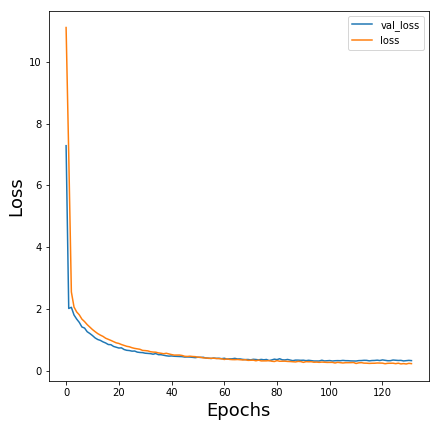

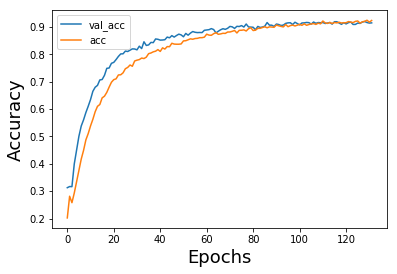

In [232]:
net = -1
name_title = ['Loss','Accuracy']
fig=plt.figure(figsize=(64,64))
for i in range(0,2):
    ax=fig.add_subplot(8,8,i+1)
    plt.plot(history[net].history[list(history[net].history.keys())[i]], label = list(history[net].history.keys())[i] )
    plt.plot(history[net].history[list(history[net].history.keys())[i+2]],label = list(history[net].history.keys())[i+2] )
    plt.xlabel('Epochs', fontsize=18)
    plt.ylabel(name_title[i], fontsize=18)
    plt.legend()
    plt.show()

Recall: [0.97697368 0.92307692 0.91467577 0.83501684 0.93831169 0.97333333
 0.85483871 0.97526502 0.95255474 0.85034014]
Precision: [0.95806452 0.95652174 0.80722892 0.91176471 0.96655518 0.92993631
 0.9137931  0.95172414 0.95255474 0.90909091]

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       304
           1       0.96      0.92      0.94       143
           2       0.81      0.91      0.86       293
           3       0.91      0.84      0.87       297
           4       0.97      0.94      0.95       308
           5       0.93      0.97      0.95       300
           6       0.91      0.85      0.88       124
           7       0.95      0.98      0.96       283
           8       0.95      0.95      0.95       274
           9       0.91      0.85      0.88       294

    accuracy                           0.92      2620
   macro avg       0.93      0.92      0.92      2620
weighted avg       0.92   

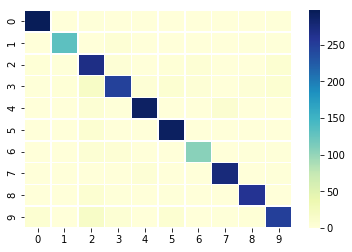

In [233]:
results = np.zeros( (val_x.shape[0],10) ) 
for j in range(nets):
  results = results  + model[j].predict(val_x)
results = np.argmax(results,axis = 1)
val_y_n = np.argmax(val_y_en,axis =1)
acc(val_y_n,results)

## **Implementing XGBOOST Algorithm on same Dataset**

In [0]:
from xgboost import XGBClassifier

In [0]:
train = np.argmax(y_en,axis =  1)
test = np.argmax(val_y_en,axis =  1)
test_x = val_x

In [0]:
model_xgb = XGBClassifier(learning_rate =0.1, 
                      n_estimators=400, 
                      max_depth=8,
                      objective= 'multi:softmax', 
                      nthread=4, )


In [222]:
model_xgb.fit(X,train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pred = model_xgb.predict(test_x)

Recall: [0.95394737 0.85314685 0.86006826 0.7979798  0.88636364 0.94666667
 0.79032258 0.96466431 0.91970803 0.84353741]
Precision: [0.95394737 0.93846154 0.7826087  0.86181818 0.90397351 0.92508143
 0.96078431 0.90397351 0.94382022 0.802589  ]

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       304
           1       0.94      0.85      0.89       143
           2       0.78      0.86      0.82       293
           3       0.86      0.80      0.83       297
           4       0.90      0.89      0.90       308
           5       0.93      0.95      0.94       300
           6       0.96      0.79      0.87       124
           7       0.90      0.96      0.93       283
           8       0.94      0.92      0.93       274
           9       0.80      0.84      0.82       294

    accuracy                           0.89      2620
   macro avg       0.90      0.88      0.89      2620
weighted avg       0.89   

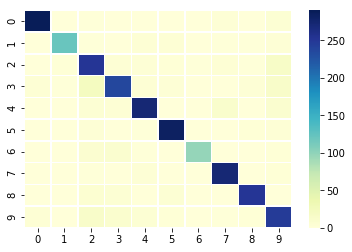

In [224]:
acc(test,pred)

Recall: [0.97368421 0.9020979  0.92150171 0.84848485 0.92857143 0.95666667
 0.82258065 0.97526502 0.95620438 0.8707483 ]
Precision: [0.96732026 0.97727273 0.81570997 0.90322581 0.94701987 0.94098361
 0.97142857 0.93877551 0.95970696 0.87372014]

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       304
           1       0.98      0.90      0.94       143
           2       0.82      0.92      0.87       293
           3       0.90      0.85      0.88       297
           4       0.95      0.93      0.94       308
           5       0.94      0.96      0.95       300
           6       0.97      0.82      0.89       124
           7       0.94      0.98      0.96       283
           8       0.96      0.96      0.96       274
           9       0.87      0.87      0.87       294

    accuracy                           0.92      2620
   macro avg       0.93      0.92      0.92      2620
weighted avg       0.92   

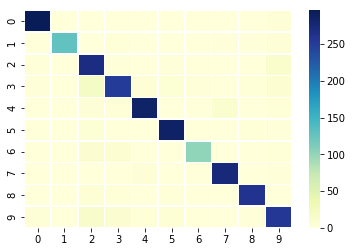

In [225]:
results = np.zeros( (val_x.shape[0],10) ) 
for j in range(nets):
  results = results  + model[j].predict_proba(val_x) + model_xgb.predict_proba(val_x)
results = np.argmax(results,axis = 1)
acc(test,results)

Recall: [0.95394737 0.88111888 0.87372014 0.80808081 0.8961039  0.94666667
 0.79032258 0.97173145 0.91970803 0.86054422]
Precision: [0.96345515 0.94736842 0.79012346 0.86330935 0.91390728 0.93114754
 0.97029703 0.90460526 0.9509434  0.82410423]

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       304
           1       0.95      0.88      0.91       143
           2       0.79      0.87      0.83       293
           3       0.86      0.81      0.83       297
           4       0.91      0.90      0.90       308
           5       0.93      0.95      0.94       300
           6       0.97      0.79      0.87       124
           7       0.90      0.97      0.94       283
           8       0.95      0.92      0.94       274
           9       0.82      0.86      0.84       294

    accuracy                           0.90      2620
   macro avg       0.91      0.89      0.90      2620
weighted avg       0.90   

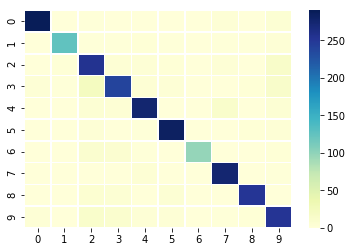

In [227]:
results = np.zeros( (val_x.shape[0],10) ) 
for j in range(nets):
  results = results  + model[j].predict_proba(val_x) + nets*model_xgb.predict_proba(val_x)
results = np.argmax(results,axis = 1)
acc(test,results)